In [2]:
from keras.models import load_model
from keras.callbacks import History 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('CPIAUCSL.csv')
# split data into training and testing sets
training_set = df.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
regressor = load_model('CPIAUCSL_Model_best_v2.h5')

In [6]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [7]:
dataset_total = df.iloc[:, 1:2].values

In [8]:
timestemp = 36
prediction_month = 36

In [9]:
result = []
for i in range(0, prediction_month):
    X_test = []
    inputs = dataset_total[len(dataset_total) - timestemp:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test.append(inputs[0:timestemp, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted = regressor.predict(X_test)
    predicted = sc.inverse_transform(predicted)
    result.append(predicted[0][0])
    dataset_total = np.append(dataset_total, predicted[0][0])
    

In [10]:
print(result)

[298.8194, 299.35754, 299.67398, 299.95776, 300.28867, 300.6858, 301.14804, 301.66965, 302.24548, 302.87097, 303.5412, 304.25092, 304.99738, 305.77625, 306.58356, 307.4153, 308.26804, 309.13806, 310.02353, 310.92163, 311.82977, 312.7438, 313.66226, 314.58328, 315.50616, 316.42947, 317.35138, 318.27396, 319.19504, 320.11377, 321.03537, 321.9591, 322.88525, 323.81433, 324.74826, 325.68805]


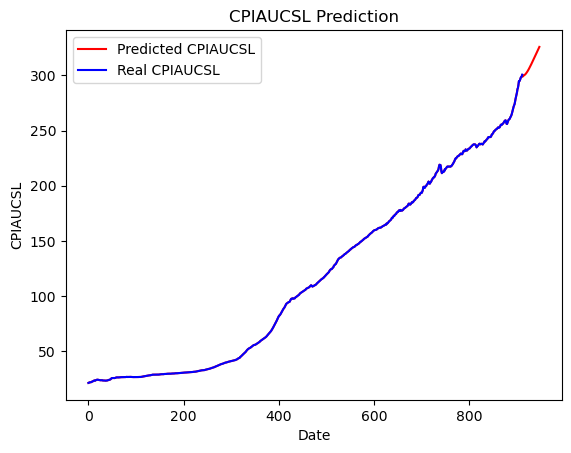

In [11]:
plt.plot(dataset_total, color = 'red', label = 'Predicted CPIAUCSL')
plt.plot(training_set, color = 'blue', label = 'Real CPIAUCSL')
plt.title('CPIAUCSL Prediction')
plt.xlabel('Date')
plt.ylabel('CPIAUCSL')
plt.legend()
plt.show()

In [12]:
result = pd.DataFrame({'CPIAUCSL': result})
result.to_csv('result.csv', index=False)